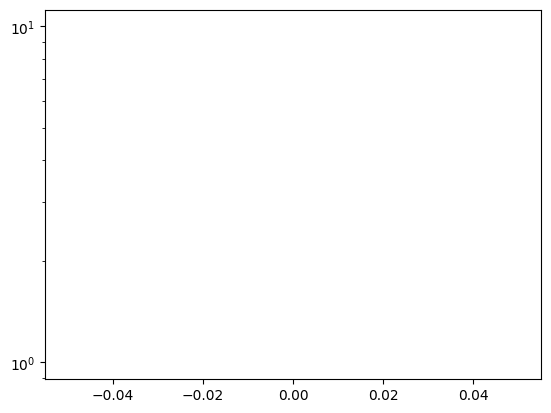

In [61]:
from bump_utils import create_clumps, create_dps, render, animate
import jaxdem as jd
import jax
import numpy as np
import jax.numpy as jnp
jax.config.update("jax_enable_x64", True)
import matplotlib.pyplot as plt

def jax_reduceat(data, offsets):
    cumsum = jnp.concatenate([jnp.array([0.0]), jnp.cumsum(data)])
    return cumsum[offsets[1:]] - cumsum[offsets[:-1]]

state = jd.utils.h5.load('state.h5')
system = jd.utils.h5.load('system.h5')
state_traj = jd.utils.h5.load('state_traj.h5')
system_traj = jd.utils.h5.load('system_traj.h5')

N_dps = jnp.unique(state.deformable_ID).size
dpids, nv = jnp.unique(state.deformable_ID, return_counts=True)
traj_vel_dp = jax.vmap(lambda x, y: jax.ops.segment_sum(x, y, N_dps))(state_traj.vel, state_traj.deformable_ID) / nv[None, :, None]
traj_mass_dp = jax.vmap(lambda x, y: jax.ops.segment_sum(x, y, N_dps))(state_traj.mass, state_traj.deformable_ID)
ke_t_dp = jnp.sum(traj_mass_dp[..., None] * traj_vel_dp ** 2, axis=(-1, -2))
temp_dp = 2 * ke_t_dp / (N_dps * state.dim)
ke = jnp.sum(state_traj.mass[..., None] * state_traj.vel ** 2, axis=(-1, -2))
temp = 2 * ke / (state.vel.size)

plt.plot(temp)
plt.plot(temp_dp)

plt.yscale('log')

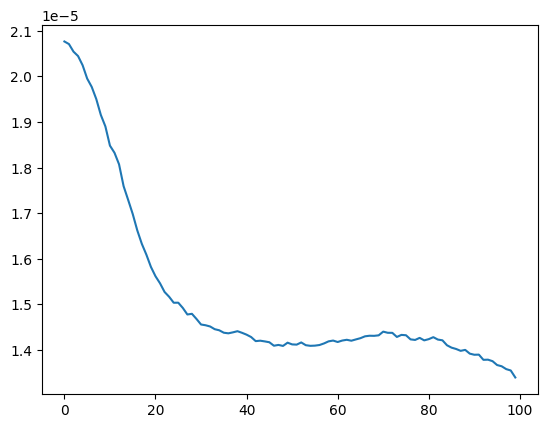

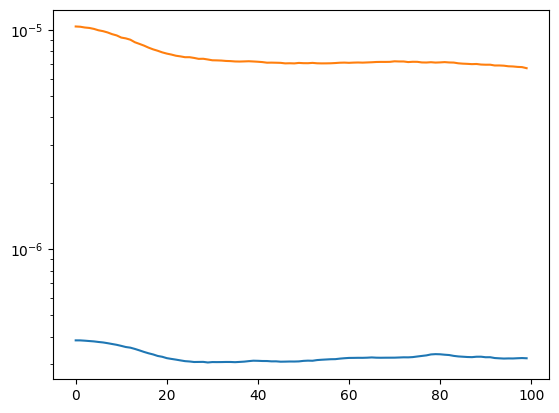

In [11]:
order = jnp.argsort(state_traj.unique_ID, axis=1)
vel = jnp.take_along_axis(state_traj.vel, order[:, :, None], axis=1)
dpid = jnp.take_along_axis(state_traj.deformable_ID, order, axis=1)

N_dps = jnp.unique(state_traj.deformable_ID).size
vel_dp = segment_avg(state_traj.vel, state_traj.deformable_ID)
mass_dp = segment_sum(state_traj.mass, state_traj.deformable_ID)
ke_t_dp = jnp.sum(0.5 * mass_dp[..., None] * vel_dp ** 2, axis=(-1, -2))
temp_dp = 2 * ke_t_dp / (N_dps * state.dim)
ke = jnp.sum(0.5 * state_traj.mass[..., None] * state_traj.vel ** 2, axis=(-1, -2))
temp = 2 * ke / (state.vel.size)

plt.plot(temp)
plt.plot(temp_dp)
plt.yscale('log')